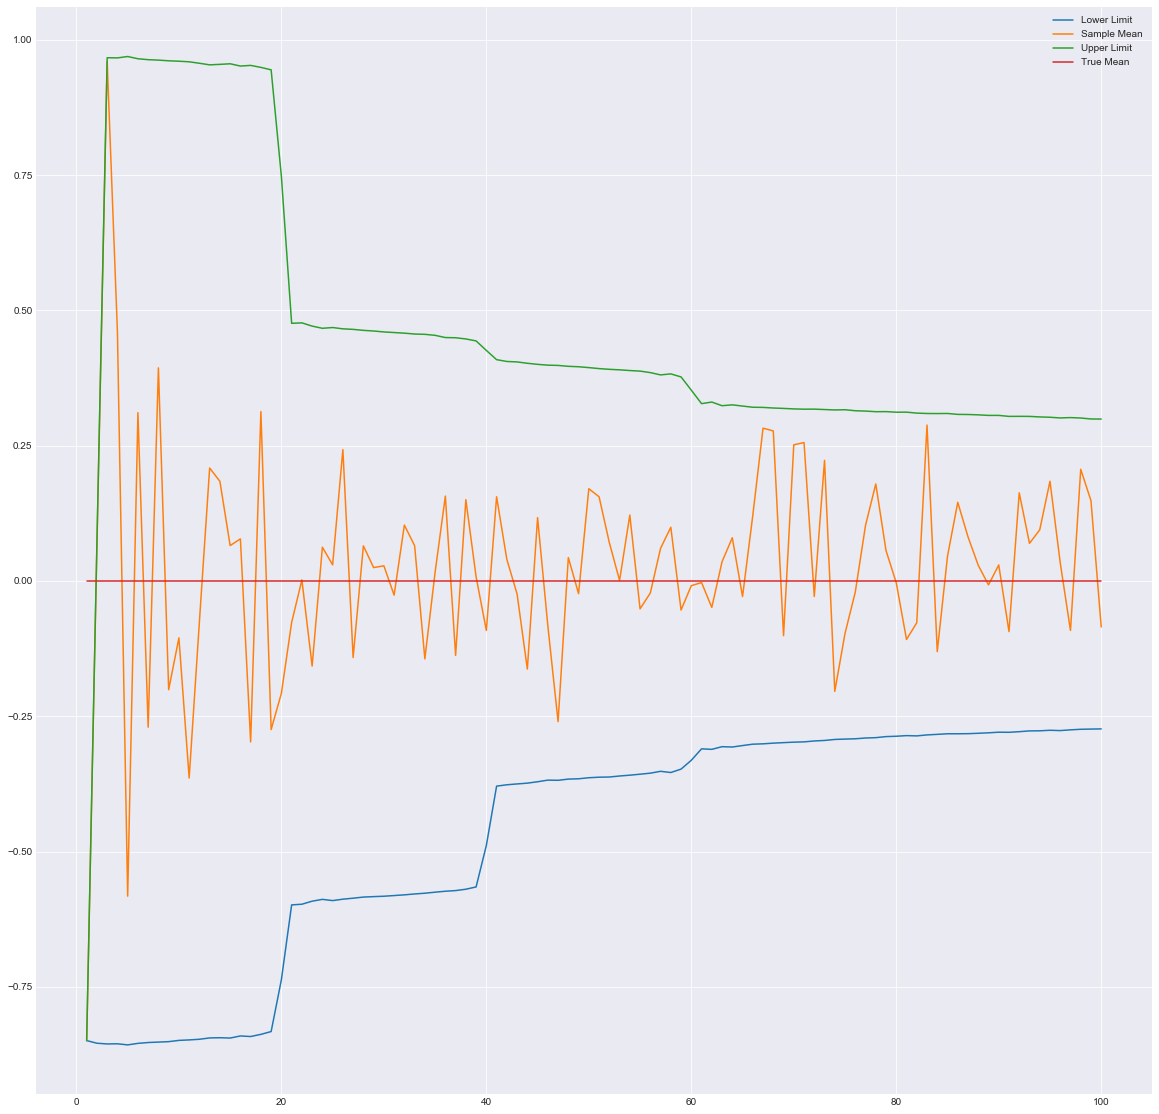

In [33]:
# Notebook for demonstrating bootstrap bounds.

import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Let the true distribuition be Gausain. Just for experiments sake. The bootstrap bounds do not make any
# assumptions about the underlying distribution.

true_mean = 0
true_stdev = 1
max_samples = 100
bootstrap_exp_count = 1000
# bootstrap samplesize
n = 10000
l_lim = []
u_lim = []
sample_mean = []

for N in range(1, max_samples+1):
    samples = np.random.normal(true_mean, true_stdev, N)
    delta_star = []
    sample_mean.append(np.mean(samples)) 
    
    for i in range(bootstrap_exp_count):
        resample_indx = np.random.randint(0,N, n)
        bootstrap_samples = samples[resample_indx]
        x_bar_star = np.mean(bootstrap_samples)
        delta_star.append(x_bar_star-sample_mean)
    
    # Calculating the quantiles of the given delta_star. For 95% confidence we select the probes as 0.05 and 0.95
    delta = sc.stats.mstats.mquantiles(delta_star, (0.05,0.95))
    l_lim.append(sample_mean[N-1] - delta[1])
    u_lim.append(sample_mean[N-1] - delta[0])

sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
plt.plot(np.arange(1,max_samples+1),l_lim, label = "Lower Limit")
plt.plot(np.arange(1,max_samples+1),sample_mean, label = "Sample Mean")
plt.plot(np.arange(1,max_samples+1),u_lim, label = "Upper Limit")
plt.plot(np.arange(1,max_samples+1),[true_mean]*max_samples, label = "True Mean")
plt.legend(loc = 'best')